# CS170A -- HW#1 -- assignment and solution form -- Octave

Your name:  ______________________

Your UID:  _________

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are
deducted.

## NOTE:  In this assignment we provide pseudocode to get you started.

In later assignments we will not do this.

# Problem 1:  SVD k-th order approximations (30 points)

If $A$ is a matrix that has SVD $A = U\,S\,V'$,
the <b>rank-k approximation of $A$</b>
keeping only the first $k$ columns of the SVD.

Specifically, given a $n \times p$ matrix $A$ with SVD $A = U\,S\,V'$,
then if $k \leq n$ and $k \leq p$, the rank-$k$ approximation of $A$ is
$$
A^{(k)} ~~=~~ U ~ S^{(k)} ~ V'
$$
where $S^{(k)}$ is the result of setting all diagonal elements to zero after the first $k$ entries
$(1 \leq k \leq p)$.
If $U^{(k)}$ and $V^{(k)}$ are like $U$ and $V$ but with all columns zero after the first $k$, then
$$
A^{(k)} ~~=~~ U ~ S^{(k)} ~ V' ~~=~~ U^{(k)} ~ S^{(k)} ~ V^{(k)'} .
$$


In class, we saw a demo of the attached Matlab script <tt>imagesvdgui.m</tt>
--- and the effectiveness of this approximation in retaining information about an image.

The goal of this problem is to implement this approximation
for black-and-white (grayscale) images.

In [1]:
load mandrill
Mandrill = ind2rgb(X, map);

A = mean( Mandrill, 3 );  # grayscale image -- size 480 x 500.
size(A)

imwrite(A, 'GrayMandrill.bmp')  % Write the Mandrill to a bitmap image file

% The matrix A now contains the Mandrill image (in grayscale)

ans =

   480   500

    imformats>default_formats at line 256 column 11
    imformats at line 79 column 3
    imwrite at line 99 column 7


Display the bitmap image file using an HTML img tag:

<img src="GrayMandrill.bmp">

&lt;img src="GrayMandrill.bmp"&gt;

###  1.(a):  Plot Singular Values of the Rank-$k$ Approximation of an Image

As in HW0, construct a grayscale version of the Mandrill image,
and take one of the 3 color planes as a 500x480 matrix.
This is our `black and white' image $A$.
You are to analyze the rank-k approximation of the image.

Compute the SVD of $A$, and plot the singular values $\sigma_1$, $\sigma_2$, ...

In [2]:
[U S V] = svd(A);       % U, S, V are now the SVD of A

norm( A - U * S * V' )  %  A should match the product of U, S, V'

ans =    1.8353e-12


###  1.(b):  Optimal Rank-$k$ Approximation of an Image

Find the value of $k$ that minimizes $\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~+~ k$.

In [3]:
[n p] = size(A)
maximum_possible_k = min(n,p)

for k=1:maximum_possible_k
   do_something = 0; % ................
end

n =  480
p =  500
maximum_possible_k =  480


###  1.(c):  The Rank-$k$ Approximation is a Good Approximation

In the chapter on the SVD, the course reader presents a derivation for $A \, - \, A^{(k)}$:
$$\begin{eqnarray*}
A \; - \; A^{(k)}
 & = &
U \; S \; V' ~ - ~ U^{(k)} ~ S^{(k)} ~ V^{(k)'}  \\
 & = &
U \; S \; V' ~ - ~ U \; S^{(k)} \; V' \\
 & = &
U \; (S ~ - ~ S^{(k)}) \; V ' \\
\end{eqnarray*}$$

Prove the following:
$$ \mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~=~ \sum_{i>k} \sigma_i^2 . $$


#### Proof  (Enter your Proof here)
Because
$A \; - \; A^{(k)} ~ = ~ U \; (S ~ - ~ S^{(k)}) \; V '$,
..............

As a result, $\mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~ = ~ ...$

Therefore
$$ \mid\mid{A \; - \; A^{(k)}}\mid\mid^2_{F} ~=~ \sum_{i>k} \sigma_i^2 . $$

# Problem 2:  Baseball Visualization (40 points)

For this dataset you are given a matrix of statistics for Baseball players.
You are to perform two kinds of analysis on this matrix.

### Read in the Baseball Statistics

Statistics of top players after the last regular season game,
obtained from MLB.com, October 2016.

In [4]:
%%% Stats = csvread('Baseball_Players_Stats_2016.csv', 1, 0);  # skip the header (= row 0)
%%% Names = csvread('Baseball_Players_Names_2016.csv', 1, 0);

Baseball_Players_2016   %% execute Baseball_Players_2016.m  to load in the data needed here

 added to session magics.



In [5]:
StatNames{1:3}

size(StatNames)

StatNames{:}

ans = Rank
ans = G
ans = AB
ans =

    1   17

ans = Rank
ans = G
ans = AB
ans = R
ans = H
ans = 2B
ans = 3B
ans = HR
ans = RBI
ans = BB
ans = SO
ans = SB
ans = CS
ans = AVG
ans = OBP
ans = SLG
ans = OPS


In [6]:
size(Stats)
Stats(1:3, :)

ans =

   146    17

ans =

 Columns 1 through 6:

     1.00000   146.00000   552.00000   104.00000   192.00000    32.00000
     2.00000   142.00000   531.00000    88.00000   184.00000    47.00000
     3.00000   161.00000   640.00000   108.00000   216.00000    42.00000

 Columns 7 through 12:

     8.00000    11.00000    66.00000    66.00000    80.00000    11.00000
     5.00000    25.00000   104.00000    35.00000    57.00000     5.00000
     5.00000    24.00000    96.00000    60.00000    70.00000    30.00000

 Columns 13 through 17:

     7.00000     0.34800     0.41600     0.49500     0.91100
     3.00000     0.34700     0.39000     0.59500     0.98500
    10.00000     0.33800     0.39600     0.53100     0.92800



In [7]:
size(PlayerNames)
PlayerNames{1:3}

ans =

   146     1

ans =   LeMahieu D
ans =   Murphy D
ans =   Altuve J


### Compute a "scaled" version of the Stats matrix

We scale each column of values ${\bf x}$ in Stats
to be  ${\bf z} = ({\bf x}-\mu)/\sigma$ in ScaledStats,
where $\mu$ is the mean of the ${\bf x}$ values, and $\sigma$ is their standard deviation.

In Octave/Matlab, the function <tt>mean()</tt> computes column means,
and <tt>std()</tt> computes standard deviations.
The function <tt>zscore()</tt> computes both,
and uses them to "scale" each column in this way.

This scaling is also called __normalization__ and __standardization__.
The __z-scores__ ${\bf z} = ({\bf x}-\mu)/\sigma$ are also called
the standardized or normalized values for ${\bf x}$.

In [8]:
ScaledStats  =  zscore(Stats);   %  z  =  (x-mu)/sigma

mean(ScaledStats)  %  the means of each column after normalization should be 0
std(ScaledStats)   %  the standard deviations of each column after normalization should be 1

ans =

 Columns 1 through 6:

  -3.1938e-17   5.0797e-16  -1.1140e-15  -1.6805e-16   2.6159e-16   2.2509e-16

 Columns 7 through 12:

  -4.5626e-17  -4.6766e-17   2.3573e-16  -1.5632e-16  -1.3079e-16  -3.5740e-17

 Columns 13 through 17:

  -2.4714e-17   4.5930e-15   6.1853e-15  -1.4676e-15   7.8856e-15

ans =

 Columns 1 through 8:

   1.00000   1.00000   1.00000   1.00000   1.00000   1.00000   1.00000   1.00000

 Columns 9 through 16:

   1.00000   1.00000   1.00000   1.00000   1.00000   1.00000   1.00000   1.00000

 Column 17:

   1.00000



### 2 (a):  Random Projections
 
A fundamental problem in data science is that it is impossible to visualize a dataset that has many features.  Given an $n \times p$ dataset (matrix) $A$ in which the number of features $p$ is large, there is no obvious way to plot the data.

_Dimensionality reduction_ algorithms have been developed that attempt to find datasets that have lower values of $p$ but approximate $A$ in some way.  Although there are sophisticated algorithms, a competitive approach is to compute a ___random projection___ of $A$ into a few dimensions.  When the projection is into 2 or 3 dimensions, the result can be visualized.

A ___random $k$-D projection___ of a $n \times p$ dataset (matrix) $A$ is the result $(A \, P)$ of multiplying $A$ on the right by a $p \times k$ matrix $P$ of random values.

The result is a $n \times k$ matrix, assigning each row in $A$ a new pair of values $(x,y)$, and these can be interpreted as positions in a 2D plot.

random projection weights:
   0.1183841   0.6010517
   0.0058368   0.0117211
   0.6914246   0.2323399
   0.2558530   0.7771435
species = 
{
  [1,1] =   s
  [1,2] =   v
  [1,3] =   V
}


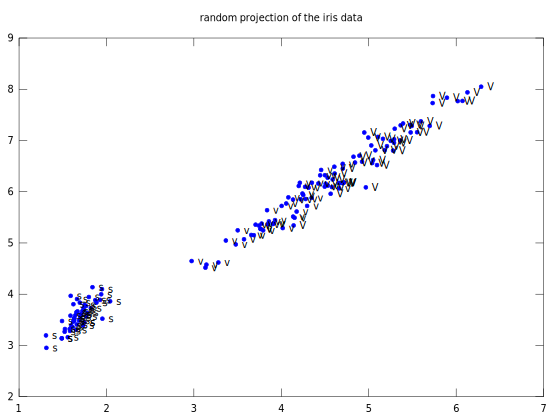

In [9]:
% plotting 2D values
Iris = csvread('iris.csv', 1,0);  % skip over the header line
A = Iris(:, 1:4);  % just the measurement columns
[n p] = size(A);
P = rand(p,2);
disp('random projection weights:')
disp(P)
XY = A * P;
plot(XY(:,1), XY(:,2), 'b.')
title('random projection of the iris data')
species = {'  s', '  v', '  V'}
text(XY(:,1), XY(:,2), species(Iris(:,5)), 'fontsize', 10 )

___Problem:___ write a function <tt>random_projection(A,k)</tt> that, given an input matrix $A$ of size $n \times p$ and an integer $k>0$, produces a random $k$-D projection.

Please use uniform random values in the matrix $P$.

Then:  plot the result of 3 random 2D projections of the data. 

In each plot, identify the ___greatest outlier___ -- the player with $(x,y)$ values that have the largest total $x+y$.  Print the row in the dataset whose projection is this outlier.

In [10]:
random_projection = @(A,k) 0 % fill in using e.g.:   ... rand(size(A,1),k) ...

for i = 1:3
   XY = random_projection( ScaledStats, 2 )

   % plot( something_involving_XY )
   %   % text( something_involving_XY, PlayerNames, 'fontsize', 10 )
   %   text( something_involving_XY, PlayerRanks, 'fontsize', 10 )
   XplusY = sum(XY,1)
   %   greatest_outlier = something_involving_XplusY % ... (XplusY == max(XplusY)) ...
end

random_projection =

@(A, k) 0

XY = 0
XplusY = 0
XY = 0
XplusY = 0
XY = 0
XplusY = 0


### 2 (b): Latent Semantic Analysis

The course reader describes __Latent Semantic Indexing__
for a matrix of values measuring association between X terms vs. Y terms.

The classic example is a "term/document matrix" for Keywords vs. Books, shown below.
The code shown produces an LSI plot for the data.

__Your job is to produce an analogous LSI plot for the table of Baseball players.__

Components are computed as in:
  Berry, M. W., Dumais, S. T., and O'Brien, G. W. (1995).
  "Using linear algebra for intelligent information retrieval."
  SIAM Review, 37(4), 1995, 573-595.

Some LSI references:
<a target="_blank"
href="http://lsi.research.telcordia.com/lsi/LSIpapers.html">lsi.research.telcordia.com/lsi/LSIpapers.html</a>

Xfactor =

   0.0158718  -0.4317246
   0.0265872  -0.3756293
   0.1784834  -0.1692080
   0.6013705   0.1186813
   0.6690689   0.1209205
   0.0147793  -0.3602535
   0.0519705  -0.2248061
   0.0065613  -0.1120144
   0.1503431   0.1126545
   0.0813181   0.0672148
   0.1503431   0.1126545
   0.1784834  -0.1692080
   0.1414814   0.0974388
   0.0105168  -0.2363185
   0.0952170   0.0398872
   0.2050705  -0.5448372

Yfactor =

   0.1591196  -0.0376639
   0.1476507   0.0438399
   0.0578865  -0.6208499
   0.3115839   0.1221947
   0.0049506  -0.1971336
   0.0247814  -0.1118276
   0.0090850  -0.3728108
   0.3677299   0.1830154
   0.0389579   0.0388300
   0.3135395   0.1277112
   0.4043925  -0.2333570
   0.4043925  -0.2333570
   0.3295292   0.1465635
   0.3135395   0.1277112
   0.2803617   0.0868681
   0.0137897  -0.1671816
   0.0625913  -0.4152207



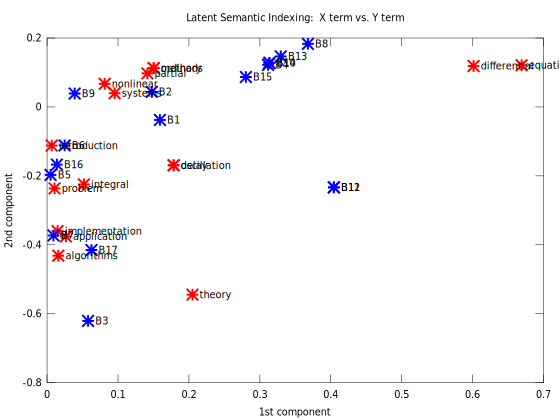

In [11]:
% X:  Keywords

nX = 16;
Xtext = {
        'algorithms',
        'application',
        'delay',
        'differential',
        'equations',
        'implementation',
        'integral',
        'introduction',
        'methods',
        'nonlinear',
        'ordinary',
        'oscillation',
        'partial',
        'problem',
        'systems',
        'theory'
        };

% Y:  Books

nY = 17;

% Book: 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17   # Keyword:
%--------------------------------------------------------------------------
coOccurrence =  [
        0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0;  % algorithms
        0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1;  % application
        0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0;  % delay
        0  0  0  1  0  0  0  1  0  1  1  1  1  1  1  0  0;  % differential
        1  1  0  1  0  0  0  1  0  1  1  1  1  1  1  0  0;  % equations
        0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0;  % implementation
        1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1;  % integral
        0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0;  % introduction
        0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0;  % methods
        0  0  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0;  % nonlinear
        0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0;  % ordinary
        0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  0;  % oscillation
        0  0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0;  % partial
        0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  1  0;  % problem
        0  0  0  0  0  1  0  1  1  0  0  0  0  0  0  0  0;  % systems
        0  0  1  0  0  0  0  0  0  0  1  1  0  0  0  0  1;  % theory
];

[U,S,V] = svd(coOccurrence);

%  We can look at a plot of the singular values (diagonal of S):

plot( diag(S), 'b' )

Xfactor = U(:,1:2)
Yfactor = V(:,1:2)

% plot the 2D projection of the data

text_offset = 0.01;
plot( Xfactor(:,1), Xfactor(:,2), 'r*' )
hold on
plot( Yfactor(:,1), Yfactor(:,2), 'b*' )

for i = (1:nX)
     text( Xfactor(i,1)+text_offset, Xfactor(i,2), Xtext(i))
end

for i = (1:nY)
     text( Yfactor(i,1)+text_offset, Yfactor(i,2), sprintf('B%d',i))
end

title( 'Latent Semantic Indexing:  X term vs. Y term ' )
xlabel( '1st component' )
ylabel( '2nd component' )

zoom on
hold off

# Problem 3: Global Warming again  (30 points)

In HW0, you plotted the average (non-missing-value) temperature anomaly over the entire grid,
for every year from 1916 to 2015.

In this problem we want you to fit linear models through the data.

maximum_anomaly_value =  19.940
minimum_anomaly_value = -24.260
US_latitude =

    9   10   11   12

US_longitude =

   15   16   17   18   19   20

total_number_of_grid_squares =  288
N =  288


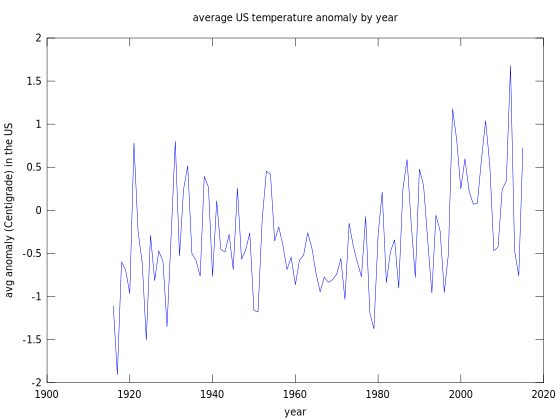

In [12]:
% set up everything as in HW#0:

GHCN = csvread('ghcn.csv');

%   The data was artificially shifted to [0, 4500];
%     its range should be [-2500, +2000]/100 = [-25,+20], in degrees Centigrade.
%     Since our focus here is on warming, we ignore temperatures below -5.
%   We omit the year and month in columns 1:2 before scaling:

GHCN_in_centigrade  = (GHCN(:,3:74) - 2500) / 100;

temperature_anomaly = reshape( GHCN_in_centigrade, [36, 12, 137, 72] );   % convert to a 4D matrix, so we can use slices

missing_values = (temperature_anomaly == -25);
number_of_missing_values = sum(sum(sum(sum( missing_values ))));

maximum_anomaly_value = max(max(max(max( temperature_anomaly ))))
minimum_anomaly_value = min(min(min(min( temperature_anomaly .*  (~ missing_values) ))))  %  '~' is 'not' in MATLAB

US_latitude  = 9:12
US_longitude = 15:20
my_years = 1916:2015;
my_slice = temperature_anomaly( US_latitude, :, my_years - 1880 + 1, US_longitude );

total_number_of_grid_squares = length(US_latitude) * length(US_longitude) * 12
N = total_number_of_grid_squares

average_US_anomaly_by_year = reshape( sum(sum(sum( my_slice, 4),2),1), [length(my_years) 1] ) / N;

plot( my_years, average_US_anomaly_by_year )
xlabel('year')
ylabel('avg anomaly (Centigrade) in the US')
title('average US temperature anomaly by year')


### (a) Global Average Temperature Anomaly:  Linear Model (Least Squares)

___Problem:___ fit a line through the data, using Least Squares.

In [13]:
average_global_anomaly_by_year = 0 % fill in something % ..........

linear_model = 0 %  fit_curve( my_years, average_global_anomaly_by_year )  % ..........


average_global_anomaly_by_year = 0
linear_model = 0


### (b) Global Average Temperature Anomaly:  Piecewise Linear Model (Least Squares)

___Problem:___ fit a 2-segment piecewise linear model through the data, using Least Squares.

Specifically, find a pair of least squares models, one from 1916 up to year Y, and one from year Y+1 to 2015, such that the SSE (sum of squared errors) is minimized.


In [14]:
minimum_SSE = 0

for Y = 1917:2013
   linear_model_up_to_Y = 0; % fit_curve( years_up_to_Y, average_global_anomaly_by_year_up_to_Y )
   linear_model_after_Y = 0; % fit_curve( years_after_Y, average_global_anomaly_by_year_after_Y )
   total_SSE = 0; % SSE_up_to_Y + SSE_after_Y
   if (total_SSE < minimum_SSE)
      do_something = 0;
   end
end

minimum_SSE = 0
